In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Simulieren von den Messungen mit Rausch
n = 100
x = np.array([1.2,1.0])
a = 10*(np.random.rand(n)-0.5)
A = np.stack( (a,np.ones(n)), axis=-1 )
b = A@x + 2.0*(np.random.rand(n)-0.5)

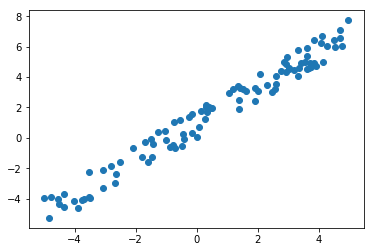

In [3]:
#Messungen
plt.scatter(a,b)
plt.show()

In [4]:
#Zielfuntion und Graident
def f(x):
    return 0.5*np.linalg.norm(A@x-b)**2

def grad(x):
    return A.T @ (A@x-b)

In [5]:
#Algorithmus
L     = np.linalg.norm(A.T@A)
sigma = 0.99/L
x     = [100,-100]
fWert = [f(x)]
#for k in range(1000):
while np.linalg.norm( grad(x) ) > 1e-6:
    x = x - sigma*grad(x)
    fWert.append(f(x))

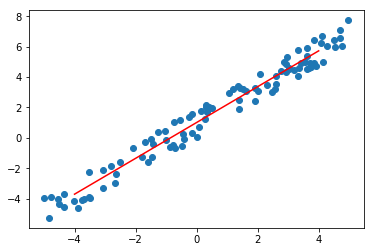

In [6]:
#Ergebnisse
plt.scatter(a,b)
plt.plot([-4,4],[x[0]*-4+x[1],x[0]*4+x[1]],color="red")
plt.show()

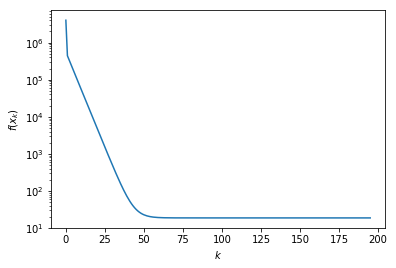

In [7]:
#plt.plot(fWert)
plt.semilogy(fWert)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(x_k)$')
plt.show()